<a href="https://colab.research.google.com/github/Luciavaldera/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA3_GRUPO_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neuronales Convolucionales**

> GRUPO A08

>Lucia Valdera Gayoso, Susana Villar Polvorosa, Julia Hernández Quintas





> ## Introducción  

En el campo del Aprendizaje Automático, las Redes de Neuronas Convolucionales (CNN) han surgido como una herramienta indispensable, demostrando su capacidad excepcional para abordar problemas complejos de clasificación y reconocimiento de patrones en imágenes.

 En esta práctica, nos sumergiremos en el proceso de diseño, configuración y entrenamiento de una CNN con el objetivo de reconocer y clasificar imágenes en el desafiante conjunto de datos CIFAR-100. Este conjunto de datos, compuesto por 60,000 imágenes agrupadas en 100 clases y organizadas en 20 superclases, proporciona un terreno fértil para explorar la capacidad de las CNN en la tarea de clasificación multiclase.


El objetivo que perseguimos es desarrollar un modelo capaz de distinguir entre 100 clases distintas, cada una con su complejidad única y características visuales, intentando conseguir la mayor precisión posible. Además pretendemos dejar constancia a lo largo del proyecto de los aprendizajes, y las dificultades que nos hayan podido
surgir.

> ## Enunciado del problema


* Crear un modelo de Red de Neuronas Convolucionales que sea capaz de reconocer y clasificar imágenes en 100 categorías.
* El modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

> ## Desarrollo del problema

En primer lugar, importamos la librería keras y hacemos algunas valoraciones sobre ella. Además de keras **importamos** el resto de **librerías** que vamos a utilizar a lo largo del programa

In [21]:
import tensorflow as tf
from tensorflow import keras

#Librerías para el desarrollo de la RNA
from keras import Sequential
from keras import layers
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

#Librerías para visualización de dataset
import matplotlib.pyplot as plt
import numpy as np

# Prepraracion de etiquetas
from keras import utils
from keras.utils import to_categorical

#Librería para matriz de confusión
from sklearn.metrics import confusion_matrix

# Librerías para ejecución del modelo
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import categorical_crossentropy


Comprobamos que la **versión de tensorflow** empleada es la 2.0.0 o superior

In [22]:
if tf.__version__ < "2.0.0":
  print('La versión de tensorflow no es la adecuada')
print(tf.__version__)
# Comprobamos también que existen GPU libres
print("GPU Available:", tf.config.list_physical_devices('GPU'))

2.14.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


> ### **Carga y análisis de datos: CIFAR100**

En este apartado cargamos los datos, tanto de entrenamiento como de test. El conjunto de datos empleado en este proyecto es CIFAR-100 que contiene 60.000 imágenes asociadas a cada una de las 100 clases que a su vez se agrupan en 20 superclases.
Cada una de las 100 clases contiene 600 imágenes.

In [23]:
from keras.datasets import cifar100

A continuación cargamos los datos de CIFAR-100 que se dividen en 4 arreglos (entrenamiento y test):

* Imágenes de entrenamiento: `train_images`
* Etiquetas de las imagénes de entrenamiento: `train_labels`
* Imágenes de test: `test_images`
* Etiquetas de las imágenes de test: `test_labels`

In [24]:
# Descargamos el conjunto de datos y dividirlo en conjuntos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

#  Convertir las etiquetas de salida de matrices 2D a matrices 1D
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

print(train_labels)
print(max(train_labels))
print(train_labels[1])
print(train_images[0].shape)

[19 29  0 ...  3  7 73]
99
29
(32, 32, 3)


**COMPRENSION Y ESTUDIO DE DATATEST**

Antes de comenzar cualquier proceso con la RNA, es importante estudiar y comprender bien nuestro conjunto de datos:


En primer lugar, y antes de visualizar algunas imágenes, guardaremos todas las clases con su nombre correspondiente, así como las superclases :

In [25]:
clases = ['manzana', 'pez_de_acuario', 'bebé', 'oso', 'castor', 'cama', 'abeja', 'escarabajo', 'bicicleta', 'botella',
'tazón', 'niño', 'puente', 'autobús', 'mariposa', 'camello', 'lata', 'castillo', 'oruga', 'ganado',
'silla', 'chimpancé', 'reloj', 'nube', 'cucaracha', 'sofá', 'cangrejo', 'cocodrilo', 'taza',
'dinosaurio', 'delfín', 'elefante', 'pez_plano', 'bosque', 'zorro', 'niña', 'hámster', 'casa',
'canguro', 'teclado', 'lámpara', 'cortacésped', 'leopardo', 'león', 'lagarto', 'langosta', 'hombre',
'árbol_de_arce', 'motocicleta', 'montaña', 'ratón', 'seta', 'roble', 'naranja', 'orquídea',
'nutria', 'palmera', 'pera', 'camioneta', 'pino', 'llanura', 'plato', 'adormidera', 'puercoespín',
'zarigüeya', 'conejo', 'mapache', 'rayo', 'carretera', 'cohete', 'rosa', 'mar', 'foca', 'tiburón', 'musaraña',
'zorrillo', 'rascacielos', 'caracol', 'serpiente', 'araña', 'ardilla', 'tranvía', 'girasol', 'pimiento_dulce',
'mesa', 'tanque', 'teléfono', 'televisión', 'tigre', 'tractor', 'tren', 'trucha', 'tulipán', 'tortuga',
'armario', 'ballena', 'árbol_de_sauce', 'lobo', 'mujer','gusano']

diccionario_animales = {
    'mamíferos': ['castor', 'delfín', 'nutria', 'foca', 'ballena'],
    'pez': ['pez_de_acuario de acuario', 'pez_plano', 'raya', 'tiburón', 'trucha'],
    'flores': ['orquídea', 'amapola', 'rosa', 'girasol', 'tulipán'],
    'Contenedores de comida': ['botella', 'tazón', 'lata', 'taza', 'plato'],
    'frutas y vegetales': ['manzana', 'seta', 'naranja', 'pera', 'pimiento_dulce'],
    'aparatos electricos del hogar': ['reloj', 'teclado', 'lámpara', 'teléfono', 'televisión'],
    'muebles para el hogar': ['cama', 'silla', 'sofá', 'mesa', 'armario'],
    'insectos': ['abeja', 'escarabajo', 'mariposa', 'oruga', 'cucaracha'],
    'grandes carnívoros': ['oso', 'leopardo', 'león', 'tigre', 'lobo'],
    'grandes cosas al aire libre hechas por el hombre': ['puente', 'castillo', 'casa', 'camino', 'rascacielos'],
    'grandes escenas naturales al aire libre': ['nube', 'bosque', 'montaña', 'llanura', 'mar'],
    'grandes omnívoros y herbívoros': ['camello', 'ganado', 'chimpancé', 'elefante', 'canguro'],
    'mamíferos de tamaño mediano': ['zorro', 'puercoespín', 'zarigüeya', 'mapache', 'zorrillo'],
    'invertebrados no insectos': ['cangrejo', 'langosta', 'caracol', 'araña', 'gusano'],
    'gente': ['bebé', 'niño', 'niña', 'hombre', 'mujer'],
    'reptiles': ['cocodrilo', 'dinosaurio', 'lagarto', 'serpiente', 'tortuga'],
    'pequeños mamíferos': ['hámster', 'ratón', 'conejo', 'musaraña', 'ardilla'],
    'árboles': ['árbol_de_arce', 'roble', 'palma', 'pino', 'arbol_de_sauce'],
    'vehículos 1': ['bicicleta', 'autobús', 'motocicleta', 'camioneta', 'tren'],
    'vehículos 2': ['cortacésped', 'cohete', 'tranvía', 'tanque','tractor']
}

VISUALIZACION DE LAS IMAGENES DE TEST

A continuación, visualizamos algunas de las imágenes de test, para poder entender mejor que aspecto tienen, y que cambios prodríamos aplicar:

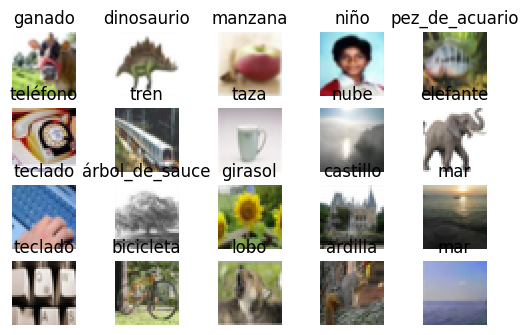

In [26]:
for i in range(20):
  plt.subplot(5, 5, i + 1)
  digit = train_images[i]
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.title(clases[train_labels[i]])
  plt.axis('off')
plt.show()

Mostramos a continuación una única imagen de entrenamiento, para poder ver el grado de borrosidad, y entender que kernel/filtro podría funcionar mejor:

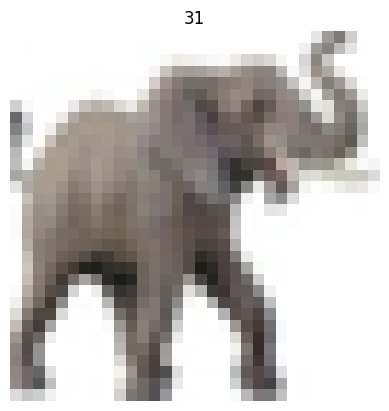

In [27]:
digit = train_images[9]
plt.imshow(digit, cmap=plt.cm.binary)
plt.title(train_labels[9])
plt.axis('off')
plt.show()

> ### **Preprocesamiento de datos**

**Preprocesamiento de etiquetas**

En primer lugar pasamos las etiquetas, a categoricas. Lo que haremos sera transformar la etiqueta en un vector de ceros, con un 1 en la posición del valor de esa etiqueta. Lo visualizamos a continuación:

In [28]:
# Transformacion de las etiquetas a one_hot_encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


**Preprocesamiento de imágenes**


A coninuación, normalizamos los valores de nuestros datos (píxeles) de entrenamiento.
Para esto los dividiremos entre 255, quedando en un rango [0,1].
Con esta normalización lo que conseguimos es facilitar la convergencia del modelo con un rango más pequeño y uniforme:

In [29]:
# Noramalización de los datos de entrada
train_images = train_images/255
test_images = test_images/255
print(len(train_images))
print(train_images.shape)

50000
(50000, 32, 32, 3)


INGENIERÍA DE CARACTERÍSTICAS:


Han sido varios los kernel/filtros y ajustes que hemos aplicado a las imágenes, con la intención de mejorar su identidad, y así poder mejorar la precisión.


Sin embargo, con ninguno de los filtros probados, la mejora de la precisión era lo suficientemene buena, como para compensar el costo computacional.
A continuación se muestran dos de los cambios aplicados, y los resultados obtenidos.


Text(0.5, 1.0, 'Filter applied Image')

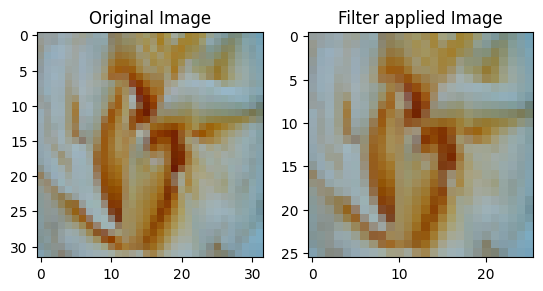

In [30]:
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
#!pip install scipy

plt.subplot(1, 2, 1)
plt.imshow(train_images[22])
plt.title("Original Image")

image = train_images[22]
zoomed_image = ndimage.zoom(image, (0.8 , 0.8 ,1) , order = 1)

plt.subplot(1, 2, 2)
plt.imshow(zoomed_image)
plt.title("Filter applied Image")

El uso del filtro Zoom, no mejora ni facilita la interpretación de nuestras imágenes, por tanto continuamos probando con diferentes kernels.

Text(0.5, 1.0, 'Filter applied Image')

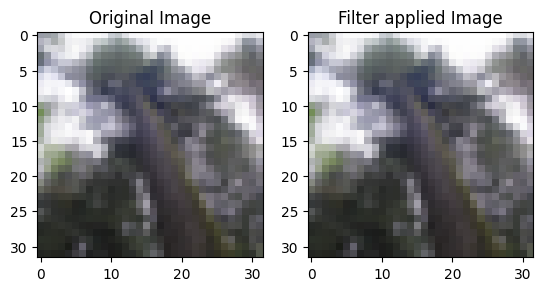

In [31]:
# import matplotlib.pyplot as plt
# from scipy import ndimage
# from scipy.ndimage import gaussian_filter
# import matplotlib.pyplot as plt
# #!pip install scipy

plt.subplot(1, 2, 1)
plt.imshow(train_images[24])
plt.title("Original Image")


image = train_images[24]
gaussian = gaussian_filter(image, sigma=0.2)


plt.subplot(1, 2, 2)
plt.imshow(train_images[24])
plt.title("Filter applied Image")

De nuevo observamos como aparentemente la imagen apenas mejora, su borrosidad sigue siendo practicamente la misma, asi como las demás características.

Además, comprobamos que la precisión tras aplicar este kernel era ligeramente menor, por lo que tampoco ha sido aplicado en nuestro modelo final.

##Arquitectura de la Red:
La elección de la arquitectura de red neuronal convolucional (CNN) se basó en su capacidad demostrada para tareas de visión por computadora. La inclusión de capas convolucionales con 128, 256 y 512 filtros busca capturar gradualmente características de baja a alta complejidad, permitiendo que la red aprenda representaciones más sofisticadas y específicas.

##Función de Activación 'elu' y Dropout:
La función de activación 'elu' se destacó por su capacidad para mitigar el problema de desvanecimiento de gradientes, especialmente en arquitecturas más profundas. Complementariamente, las capas de Dropout con tasas del 25% y 50% fueron introducidas estratégicamente para evitar el sobreajuste, al desactivar aleatoriamente ciertas neuronas durante el entrenamiento.

##Capas Totalmente Conectadas y Número de Neuronas:
La inclusión de una capa totalmente conectada con 1024 neuronas antes de la capa de salida busca proporcionar un espacio de representación más denso, permitiendo a la red aprender características complejas. La capa de salida final cuenta con 100 neuronas, reflejando la cantidad de clases en el conjunto de datos CIFAR-100.

##Función de Pérdida y Optimizador:
La elección de la función de pérdida 'Categorical Crossentropy' se justifica por ser apropiada para problemas de clasificación con múltiples clases. El optimizador Adam se adoptó con una tasa de aprendizaje de 0.0001 y decaimiento para facilitar un entrenamiento estable y rápido.

##Aumento de Datos y Preprocesamiento:
El aumento de datos a través de ImageDataGenerator fue implementado para mejorar la capacidad del modelo para generalizar a datos no vistos. Este enfoque busca aumentar la variabilidad del conjunto de entrenamiento y, por lo tanto, mejorar la robustez del modelo

##División del Conjunto de Datos y Callbacks:
El conjunto de datos se dividió en conjuntos de entrenamiento y validación mediante la función train_test_split. La inclusión de callbacks como EarlyStopping y ReduceLROnPlateau demuestra la atención a la eficiencia del entrenamiento. EarlyStopping evita el sobreajuste al detener el entrenamiento cuando la pérdida en el conjunto de validación deja de mejorar, mientras que ReduceLROnPlateau ajusta la tasa de aprendizaje para mejorar la convergencia.

#Construcción y Análisis de la Red Neuronal Convolucional (CNN)

Iniciamos la construcción de la Red Neuronal Convolucional (CNN), fundamentando nuestra arquitectura en capas que constituyen la esencia de la red.

Añadimos las capas principales:

1. La primera capa es una **capa convolucional (Conv2D)** con 128 filtros de 3x3 y relleno 'same'. Aplicamos la función de activación **'elu'**. También se establece la configuración de entrada (input_shape) como (32, 32, 3), lo que indica que la red espera recibir imágenes de 32x32 píxeles con tres canales de color (rojo, verde y azul, o RGB).
> El output shape y los parámetros de la primera capa (`Conv2D`) indican la estructura de salida de esta capa y la cantidad de parámetros entrenables asociados:

>>- **(None, 32, 32, 128):**
  - `None`: Este valor suele representar la dimensión de la cantidad de muestras en nuestros lote (batch).
  - `32, 32, 128`: Esto indica que la salida de la capa es un tensor tridimensional con dimensiones 32x32 y 128 canales. Cada canal representa un "filtro" que la capa ha aplicado a la imagen de entrada.

>>- **3584 parámetros entrenables:**
  - Estos parámetros están asociados con los pesos de la capa. La cantidad de parámetros se calcula multiplicando el tamaño del kernel (en nuestro caso, (3,3)), el número de canales de entrada (3, correspondientes a los canales RGB), y el número de filtros (128) en la capa convolucional.



2. Seguimos con otra capa convolucional (Conv2D) de 128 filtros y función de activación 'elu'.

3. Introducimos una capa de **MaxPooling2D** con una ventana de 2x2 para reducir dimensiones y aplicamos **Dropout** para regularizar.

>Analicemos la salida (`output shape`) y los parámetros de la primera capa `MaxPooling2D`:

>>- **(None, 15, 15, 128):**
  - `None`: Al igual que antes, representa la dimensión de la cantidad de muestras en tu lote (batch).
  - `15, 15, 128`: La capa `MaxPooling2D` ha reducido las dimensiones espaciales de la salida de la capa anterior a la mitad (debido a `pool_size=(2,2)`), manteniendo los 128 canales sin cambios. Entonces, el tamaño de la salida es 15x15 con 128 canales.

>>- **0 parámetros entrenables:**
  - La capa `MaxPooling2D` no tiene parámetros entrenables. La operación de pooling simplemente selecciona el valor máximo de un conjunto de valores y no tiene pesos ajustables.


4. Repetimos el patrón con dos capas convolucionales (256 filtros cada una), MaxPooling2D y Dropout.

5. Seguimos con dos capas convolucionales más (512 filtros cada una), MaxPooling2D y Dropout para finalizar las capas convolucionales.

6. Aplanamos los datos con **Flatten()** para preparar la entrada a las capas densas.

7. Introducimos dos capas densas (Dense) con 1024 y 100 nodos respectivamente, utilizando la función de activación 'elu' en ambas y aplicando Dropout entre ellas.

>Vamos a ver la salida (`output shape`) y los parámetros de la primera capa `Dense`:

>>- **(None, 1024):**
  - `None`: Nuevamente, representa la dimensión de la cantidad de muestras en tu lote (batch).
  - `1024`: La capa `Dense` tiene 1024 neuronas en esta capa, lo que significa que cada muestra en el lote se asignará a un vector de 1024 dimensiones.

>>- **2,098,176 parámetros entrenables:**
  - Esta cifra indica la cantidad de parámetros que la red neuronal aprenderá durante el entrenamiento.
  Se calcula:
      - La capa `Dense` está completamente conectada, lo que significa que cada neurona en esta capa está conectada a cada neurona en la capa anterior.
    - La entrada proviene de la capa anterior, que tiene la forma `(None, 15 * 15 * 128)` (el tamaño de la salida de la última capa de `MaxPooling2D`).
    - Por lo tanto, el número de conexiones ponderadas (pesos) es `15 * 15 * 128 * 1024`.
    - Además, hay un sesgo (bias) para cada neurona, dando lugar a otros `1024` parámetros.
    - En total, `15 * 15 * 128 * 1024 + 1024 = 2,098,176` parámetros entrenables.

8. La última capa densa, con 100 nodos, emplea la función de activación 'softmax' para las 100 clases de nuestro sistema.

Esta arquitectura es resumida por el resumen del modelo, que muestra un total de 6,777,060 parámetros entrenables.

A continuación, compilamos el modelo con la función de pérdida categorical_crossentropy, el optimizador **Adam** con una tasa de aprendizaje de 0.0001 y métricas de precisión.

Durante el entrenamiento, aplicamos aumentación de datos mediante **ImageDataGenerator**, y también implementamos el uso de **EarlyStopping** para evitar el sobreajuste.

Al final del entrenamiento, evaluamos el modelo en el conjunto de prueba, proporcionando una visión general de su rendimiento.

### Resumen de la Arquitectura del Modelo:

* Total de Parámetros: 6,777,060 (25.85 MB).
* Parámetros Entrenables: 6,777,060 (25.85 MB).
* Parámetros No Entrenables: 0 bytes.



**MODELO DE RED NEURONAL CONVOLUCIONAL**

En este apartado hemos creado nuestro modelo de red neuronal convolucional desarrollado previamente.

En este caso, hemos realizado una subdivisión de los datos, para poder analizar el sobreentrenamiento del modelo, y elegir las epocas adecuadas.

Lo que se ha hecho es dividir el datset de la siguiente forma: los datos de test o evaluación no se utilizaran en esta parte, y los datos de entrenamiento se dividirán por una parte en tr_images y tr_labels, una partición de los datos de entrenamiento, con los que se entrena este modelo. El resto de ellos seran los de validación, con los que evaluaremos el modelo y su sobreentrenamiento.

Para plasmar mejor la idea de este importante concepto, se añade la siguiente imagen:

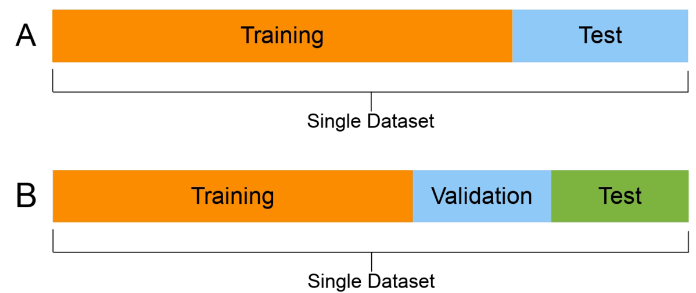

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Activation

tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Ajustar el número de neuronas en la capa de salida según el número de clases
num_classes = 100  # Ajusta esto al número real de clases en los datos
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',input_shape=tr_images.shape[1:]))
model.add(Activation('elu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('elu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))

model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

model.summary()

model.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(train_images)

# Aplicar aumento de datos durante el entrenamiento
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights=True)

history = model.fit(
    datagen.flow(tr_images, tr_labels, batch_size=50),
    steps_per_epoch=len(tr_images) // 50,
    epochs=80,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping]
)


# Generate generalization metrics
test_loss, test_acc = model.evaluate(val_images, val_labels)
print("Test accuracy: ", test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_16 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 128)       147584    
                                                                 
 activation_17 (Activation)  (None, 30, 30, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 128)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 128)       0         
                                                      

### GRÁFICAS DE SOBRENTRENAMIENTO

Se grafican ahora los resultados obtenidos, tanto de perdida como de precisión, para el número de épocas elegido, y se observa el sobreentrenamiento generado, para así poder tomar una decisión de cara al modelo final.

In [ ]:
# Graficar las curvas de pérdida y precisión durante el entrenamiento y la validación
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

##Elección de las épocas


La elección de la época 80 como punto crítico para observar sobreentrenamiento se basa en una evaluación visual de las curvas de pérdida y precisión durante el entrenamiento y la validación. A partir de la época 80, se percibe claramente un aumento en la pérdida de validación, mientras que la pérdida de entrenamiento sigue disminuyendo, indicando una brecha creciente entre la capacidad del modelo para generalizar y memorizar el conjunto de entrenamiento. Este punto de inflexión sugiere que el modelo comienza a sobreentrenarse, destacando la importancia de detener el entrenamiento en esta etapa para evitar un deterioro en la capacidad de generalización. Además, la elección de la época 80 se respalda en consideraciones prácticas, como el equilibrio entre rendimiento y costo computacional, optimizando la identificación temprana del sobreentrenamiento sin incurrir en un tiempo excesivo de entrenamiento.

In [ ]:



# Ajustar el número de neuronas en la capa de salida según el número de clases
num_classes = 100  # Ajusta esto al número real de clases en tus datos
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',input_shape=train_images.shape[1:]))
model.add(Activation('elu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('elu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))

model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

model.summary()

model.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(tr_images)


history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=50),
    steps_per_epoch=len(train_images) // 50,
    epochs=80,
)


# Generate generalization metrics
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)


   Al observar los gráficos, se pueden identificar los siguientes escenarios relacionados con el sobreentrenamiento:

###Pérdida de entrenamiento y pérdida de validación:
Si la pérdida de entrenamiento disminuye continuamente mientras que la pérdida de validación comienza a aumentar, es una señal de posible sobreentrenamiento. Esto indica que el modelo está memorizando el conjunto de entrenamiento en lugar de aprender patrones generales.
###Precisión de entrenamiento y precisión de validación:
Si la precisión de entrenamiento sigue mejorando mientras que la precisión de validación se estanca o disminuye, es otra indicación de sobreentrenamiento. La precisión de entrenamiento puede alcanzar niveles cercanos al 100%, pero si el modelo no generaliza bien a nuevos datos, este comportamiento no es deseado.
###Diferencia entre pérdida y precisión de entrenamiento y validación:
Una brecha significativa entre las métricas de entrenamiento y validación puede sugerir sobreentrenamiento. Un modelo ideal debería generalizar bien a datos no vistos, lo que se reflejaría en métricas de validación comparables a las de entrenamiento.


In [ ]:
# Translate categorial to array for drawing confusion matrix
from sklearn.metrics import confusion_matrix
from numpy import argmax
prediction = []
true_labels = []

pred = model.predict(test_images)
print(test_labels.shape[0])
for i in range(test_labels.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(test_labels[i]))

cm = confusion_matrix(prediction, true_labels)


# Plot the confusion matrix
import matplotlib.pyplot as plt
print(cm)
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + clases)
ax.set_yticklabels([''] + clases)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculating f1 score
from sklearn.metrics import f1_score
print(f"f1 score: {f1_score(true_labels, prediction, average='weighted')}")


from sklearn.metrics import classification_report
print(classification_report(true_labels, prediction, target_names=clases, digits=5))



##ANALISIS MATRIZ DE CONFUSIÓN
El análisis de los resultados revela que el modelo presenta una precisión global del 0.62 en el conjunto de prueba, indicando una capacidad de clasificación considerable. Se observan áreas de fortaleza en la diagonal principal de la matriz de confusión, señalando una buena capacidad de clasificación en algunas clases específicas. Sin embargo, desafíos notables surgen en la distinción entre ciertas clases, como "aquarium" y "fish", o "hamster" y "mouse", sugiriendo similitudes visuales entre ellas. La matriz de confusión proporciona una representación visual de estos patrones, y el análisis detallado del informe de clasificación ofrece métricas específicas por clase, destacando áreas específicas de mejora. El puntaje F1 ponderado, que combina precisión y exhaustividad, ofrece un equilibrio general del rendimiento del modelo. En general, se identifican oportunidades para optimizar el modelo mediante ajustes en la arquitectura, la implementación de estrategias de aumento de datos y otras técnicas específicas para abordar las áreas identificadas de mejora. Este enfoque permitirá mejorar la capacidad de generalización del modelo y abordar las confusiones específicas entre clases.

**PREDICCIONES**

A continuación, mostramos y analizamos las predicciones que hace nuestro modelo para 10 de las imágenes de test o evaluación:


In [ ]:
# predictions = model.predict(test_images)
# random_indices = np.random.choice(100, size=10, replace=False)

# print('\n' + '-'*60 + '\n')
# for i in (random_indices):
#   print (f"--> Imagen {i+1}")
#   print('Resultado de la predicción:',clases[np.argmax(predictions[i])])
#   print('Etiqueta real:',clases[np.argmax(test_labels[i])])
#   digit = test_images[i]
#   plt.figure(figsize=(2, 2))
#   plt.imshow(digit, cmap=plt.cm.binary)
#   plt.axis('off')
#   plt.show()
#   print('\n''\n')



#def encontrar_vector(palabra):
    #for clave, valor in diccionario_animales.items():
        #if palabra in valor:
            #return clave
#def plot_image(i, predictions_array, true_label, img):
  #predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  #plt.grid(False)
  #plt.xticks([])
 # plt.yticks([])

  #plt.imshow(img, cmap=plt.cm.binary)

  #predicted_label = np.argmax(predictions_array)
  #if predicted_label.all() == true_label.all():
    #color = 'blue'
  #else:
    #color = 'red'

  #plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                #100*np.max(predictions_array),
                                #true_label),
                                #color=color)

#def plot_value_array(i, predictions_array, true_label):
  #predictions_array, true_label = predictions_array, true_label[i]
  #plt.grid(False)
  #plt.xticks(range(10))
  #plt.yticks([])
  #thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  #plt.ylim([0, 1])
  #predicted_label = np.argmax(predictions_array)

  #print(true_label)
 # thisplot[predicted_label].set_color('red')
  #thisplot[true_label].set_color('black')


#predictions = model.predict(test_images)
#random_indices = np.random.choice(100, size=10, replace=False)
#suma1 = 0
#suma2 = 0


#print('\n' + '-'*60 + '\n')
#for i in (random_indices):

  #print (f"--> Imagen {i}")
  #plt.figure(figsize=(6,3))
  #plt.subplot(1,2,1)
  #plot_image(i, predictions[i], test_labels, test_images)
  #plt.subplot(1,2,2)
  #plot_value_array(i, predictions[i],  test_labels)
  #plt.show()
  #plt.clf()
  #print('PREDICCIONES DE SUPERCLASES')
  #print('Super clase predicha:',encontrar_vector(clases[np.argmax(predictions[i])]))
  #print('Super clase real:',encontrar_vector(clases[np.argmax(test_labels[i])]))
  #print('\n''\n')
  #print('\n''\n')

  # Numero de aciertos en clases
  #if encontrar_vector(clases[np.argmax(predictions[i])]) == encontrar_vector(clases[np.argmax(test_labels[i])]):
   # suma1 = suma1 + 1

  #if clases[np.argmax(predictions[i])] == clases[np.argmax(test_labels[i])]:
    #suma2 = suma2 + 1

#print(suma1)
#print(suma2)




**ANÁLISIS DE PREDICCIONES**

Hemos comprobamos las predicciones de nuestro modelo para 10 imágenes aleatorias, así como los porcentajes que representan la probabilidad de que pertencezca a las 10 clases más altas(más probables).

Además de esto, mostramos también las predicciones y etiquetas de las subclases. Así hemos podido comprobar que en muchos casos, pese a no predecir bien la clase, la subclase si que es la misma que la de etiqueta real.

Lo vemos mejor en esta gráfica:

In [ ]:
etiquetas = ['Aciertos', 'Errores']
valores = [suma1, 10-suma1]

plt.bar(etiquetas, valores, color=['green', 'blue'])
plt.xlabel('Sumas')
plt.ylabel('Número de Aciertos')
plt.title('Comparación de Aciertos SUPERCLASES')
plt.ylim(0, 10)  # Establecer límite superior en el eje y
plt.show()

etiquetas = ['Aciertos', 'Errores']
valores = [suma2, 10-suma2]
plt.bar(etiquetas, valores, color=['green', 'blue'])
plt.xlabel('Sumas')
plt.ylabel('Número de Aciertos')
plt.title('Comparación de Aciertos CLASES')
plt.ylim(0, 10)  # Establecer límite superior en el eje y
plt.show()

##COMPARACIÓN DE MODELOS

**MODELO INCIAL**

A continuación, se inserta el modelo base con el que comenzamos a trabajar, con una precisión relativamente baja, y a partir del cual pudimos ir dando pasos, y añadiendo mejoras, hasta llegar al modelo final presentado en esta entrega.

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((3, 3)))

model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=23, batch_size=128)


test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

**Arquitecturas de los dos modelos (base y final):**

*Modelo Base:*

Utiliza una arquitectura de red sencilla con dos capas convolucionales y una capa completamente conectada al final.

   ```python
   model = Sequential()
   model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
   model.add(MaxPooling2D((2, 2)))
   model.summary()
   model.add(Conv2D(64, (5, 5), activation='relu'))
   model.add(MaxPooling2D((2, 2)))
   model.summary()

   model.add(Flatten())
   model.add(Dense(10, activation='softmax'))
   model.summary()
   ```

*Modelo Final:*

Utiliza una arquitectura más profunda con capas de activación 'elu' para una mejor convergencia.
Aplica capas de Dropout para la regularización y prevención del sobreajuste.
Aumenta el número de filtros en las capas convolucionales para aprender características más complejas.

   ```python
   num_classes = 100  # Ajusta esto al número real de clases en tus datos
   model = Sequential()
   model.add(Conv2D(128, (3, 3), padding='same', input_shape=train_images.shape[1:]))
   model.add(Activation('elu'))
   model.add(Conv2D(128, (3, 3)))
   model.add(Activation('elu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Dropout(0.1))
   model.add(Conv2D(256, (3, 3), padding='same'))
   model.add(Activation('elu'))
   model.add(Conv2D(256, (3, 3)))
   model.add(Activation('elu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Dropout(0.25))

   model.add(Conv2D(512, (3, 3), padding='same'))
   model.add(Activation('elu'))
   model.add(Conv2D(512, (3, 3)))
   model.add(Activation('elu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Dropout(0.5))
   model.add(Flatten())
   model.add(Dense(1024))
   model.add(Activation('elu'))
   model.add(Dropout(0.5))
   model.add(Dense(100))
   model.add(Activation('softmax'))

   model.summary()
   ```

   - En el código final, hemos mejorado la arquitectura de la red agregando capas de activación 'elu', capas de Dropout para regularización, y utilizando un mayor número de filtros en las capas convolucionales.

**Compilación y Entrenamiento:**

*Modelo Inicial:*

Utiliza el optimizador SGD (Gradiente Descendente Estocástico) con una tasa de aprendizaje predeterminada.
   ```python
   model.compile(loss='categorical_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])

   model.fit(train_images, train_labels,
             batch_size=100,
             epochs=5,
             verbose=1)
   
   test_loss, test_acc = model.evaluate(test_images, test_labels)
   print('Test accuracy:', test_acc)
   ```

*Modelo Final:*

   Utiliza el optimizador Adam con una tasa de aprendizaje adaptativa más baja y un término de decaimiento (decay).
Aplica EarlyStopping para detener el entrenamiento si no hay mejoras en la validación.

   ```python
   model.compile(loss=categorical_crossentropy,
                 optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6),
                 metrics=['accuracy'])

   # Data augmentation
   datagen = ImageDataGenerator(
       # ... (parámetros de aumento de datos)
   )

   datagen.fit(train_images)

   # Aplicar aumento de datos durante el entrenamiento
   early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights=True)

   history = model.fit(
       datagen.flow(train_images, train_labels, batch_size=50),
       steps_per_epoch=len(train_images) // 50,
       epochs=70,
       validation_data=(val_images, val_labels),
       callbacks=[early_stopping]
   )

   test_loss, test_acc = model.evaluate(test_images, test_labels)
   print("Test accuracy: ", test_acc)
   ```

   - En el código final, hemos mejorado el proceso de entrenamiento utilizando el optimizador Adam con una tasa de aprendizaje más baja, implementando un generador de aumento de datos (ImageDataGenerator) y añadiendo el EarlyStopping para detener el entrenamiento si no hay mejora.



## **Organización del proyecto**

Esta práctica ha sido un verdadero reto para nosotras, pues cada vez el nivel de las prácticas es mayor, y hemos querido mantener el nivel de nuestras anteriores.

Es por ello que la organización de nuestro equipo ha sido similar ha como lo veniamos haciendo, hemos llevado a cabo la práctica


La práctica ha supuesto un reto para nosotras. Comenzamos con el código, que realizamos basándonos en la práctica del primer ejemplo de una red neuronal. Con eso ya teníamos la base para empezar a analizar el proyecto y desarrollar la memoria.
Al querer ejecutar los 8 modelos hubo algunas complicaciones, optamos por multiples opciones, como un swich un bucle, hasta que dimos con la idea de la función. La función nos facilito y optimizó el porceso pero a su vez fue mas difícil de identificar que varibales tendrían que salir de la funcion para luego poder llegar a graficar ya que al tener que ejecutar 10 veces cada modelo no podíamos graficar dentro de la función.
Tras conseguir superar el mayor obstáculo nuestra siguiente tarea fue implementar nuestra red neuronal para poder realizar los ejercicios requeridos en la práctica, los metodos usados los redactamos posteriormente asi como interpetamos los resultdos obtenidos.


La gran parte del trabajo la hemos realizado juntas en varias reuniones a lo largo de la semana. Estamos bastante acostumbadas a trabajar en grupo y sabemos los fuertes de cada una pero sobre todo sabemos organizarnos para que el trabajo que no podemos hacer en las reuniones quede repatido de forma equitativa.

Exactamente no sabriamos decir que ha hecho cada una porque aunque inevitablemente alguna le ha dedicado mas tiempo a una cosa u otra siempre ha participado para ayudar o completar el trabajo de otra.

En resumen Lucía y Julia se han dedicado mayoritariamente a la creación de la red neuronal aunque también han formado parte del análisis de resultados de la red, mientras que Susana ha dedicado más tiempo a el análisis de resultados pero, a su vez ha trabajado con la creación de la red neuronal. Pero como ya hemos mencionado antes el trabajo se ha hecho a lo largo de varias reuniones, todas participando en todo.